In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex
from math import sqrt, pi

%matplotlib inline
from matplotlib import *

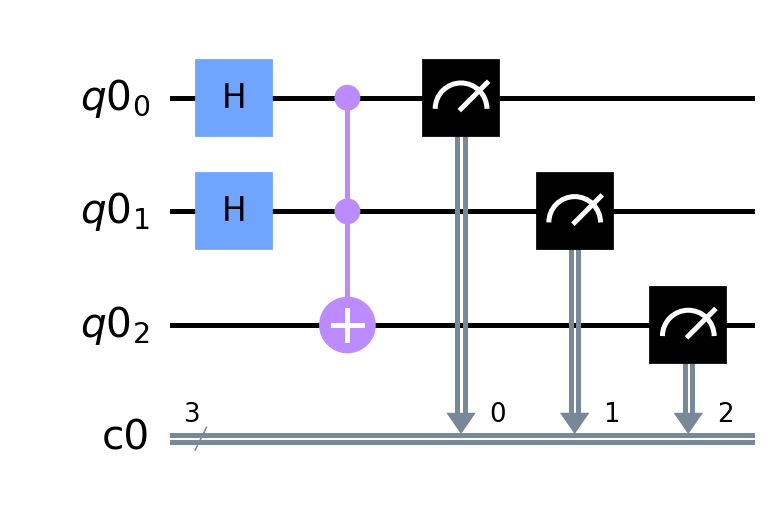

In [2]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.h(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=2.5)

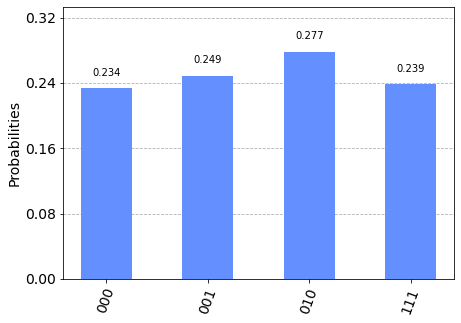

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

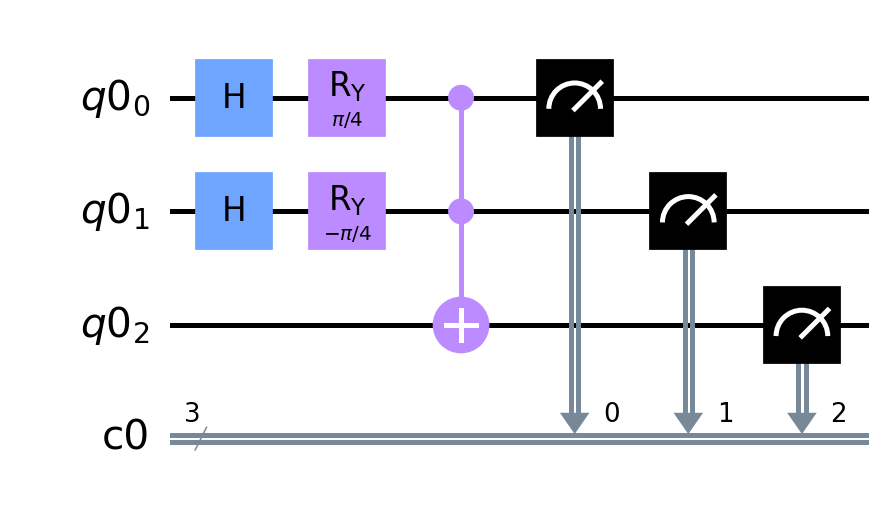

In [4]:
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.h(qr[1])
circuit.ry(pi/4, qr[0])
circuit.ry(-pi/4, qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=2.5)

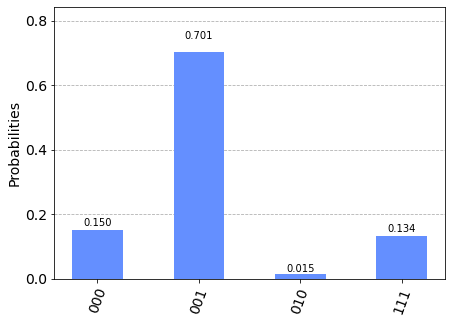

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

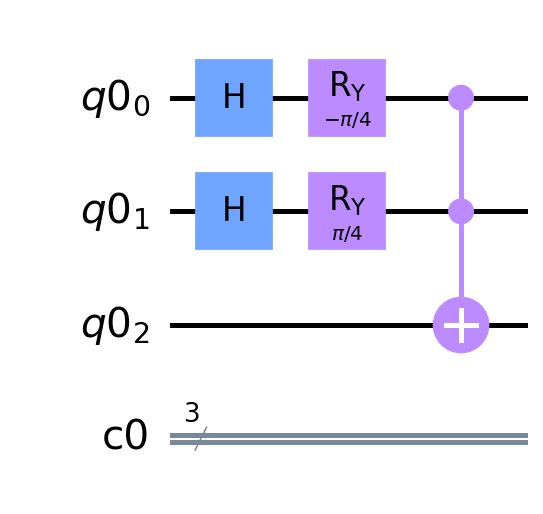

In [6]:
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.h(qr[1])
circuit.ry(-pi/4, qr[0])
circuit.ry(pi/4, qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.draw(output='mpl', scale=2.5)

In [7]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj = assemble(circuit)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

/home/joey/.local/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Latex object>

/home/joey/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


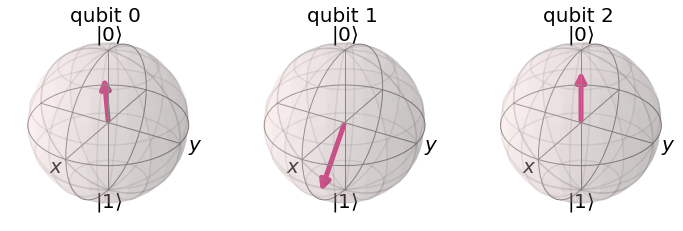

In [8]:
plot_bloch_multivector(final_state)

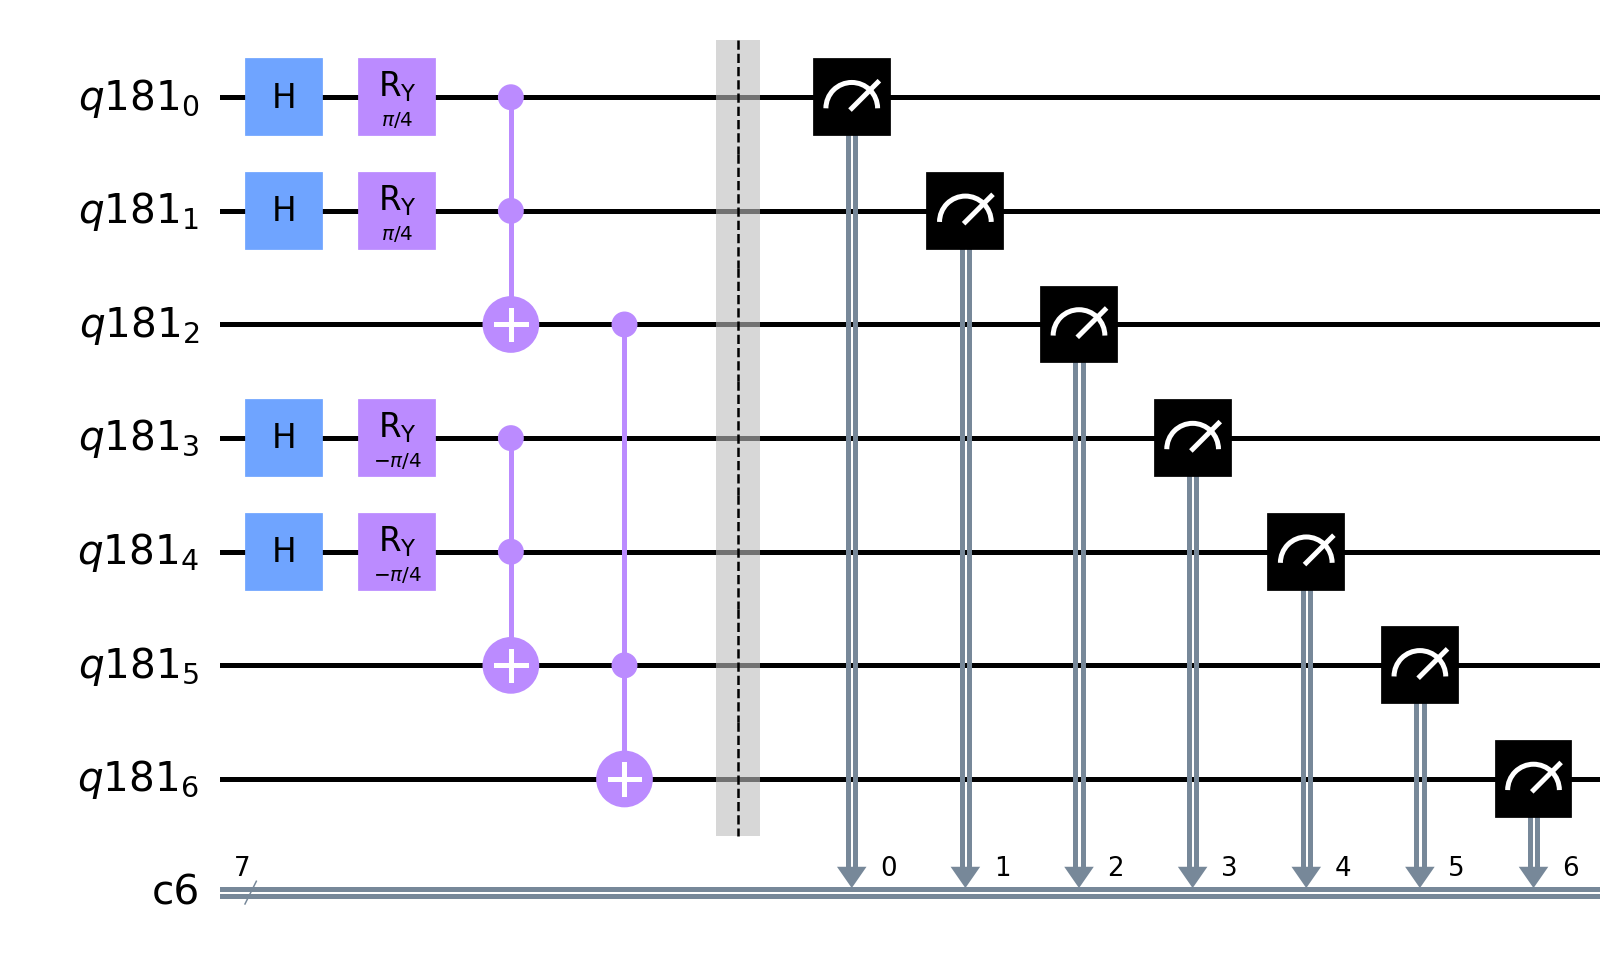

In [22]:
qr = QuantumRegister(7)
cr = ClassicalRegister(7)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.ry(pi/4, qr[0])
circuit.h(qr[1])
circuit.ry(pi/4, qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.h(qr[3])
circuit.ry(-pi/4, qr[3])
circuit.h(qr[4])
circuit.ry(-pi/4, qr[4])
circuit.ccx(qr[3], qr[4], qr[5])
circuit.ccx(qr[2], qr[5], qr[6])
circuit.barrier()
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=2.5)

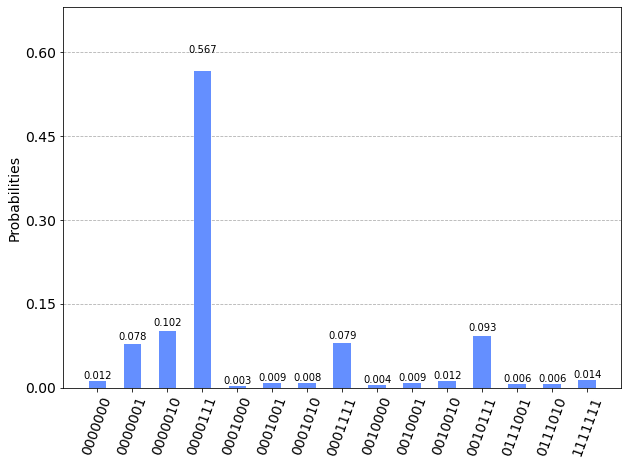

In [23]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit), figsize=(10,7))